# Link to The Github Repository for the Assignment:

https://github.com/Janvii01/Algerian_forest_files_assignment

#### IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import pickle

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


#### LOADING THE DATASET

In [2]:
# Loading the Algerian forest fires dataset
df=pd.read_csv(r"C:\Users\shuba\Downloads\Algerian_forest_fires_cleaned (2).csv")

#### EXPLORING THE DATASET

In [3]:
# Displaying basic information about the dataset
print("\nDataset Info:")
print("-----------------------------------------")
print(df.info())


Dataset Info:
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None


In [4]:
# Displaying the first 20 rows of the dataset

print("First 20 Rows of the Dataset:")
df.head(20)

First 20 Rows of the Dataset:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0


In [5]:
# Display summary statistics of the dataset

print("\nSummary Statistics of the dataset:")
print("-----------------------------------------------")
df.describe()


Summary Statistics of the dataset:
-----------------------------------------------


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [6]:
# Check for missing values in the dataset

print("\nMissing Values:")
print("------------------------------------")
df.isnull().sum()


Missing Values:
------------------------------------


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

## 1. DATA CLEANING AND PREPROCESSING

### Handling the errors effectively

In [7]:
# Checking unique classes in the dataset

print("Unique Classes in the Dataset:")
print(df['Classes'].unique())

Unique Classes in the Dataset:
['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [8]:
# Striping extra spaces from the 'Classes' column
df['Classes']=df['Classes'].str.strip()

# printing the unique values in the 'Classes' column
print(df['Classes'].unique())

['not fire' 'fire']


In [9]:
# Mapping 'Classes' to numerical values

# 'fire' is mapped to 1 and 'not fire' is mapped to 0
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})

In [10]:
# Printing the unique values in the 'Classes' column after mapping

print("Unique Classes After Mapping:")
print(df['Classes'].unique())

Unique Classes After Mapping:
[0 1]


In [11]:
# printing the unique values in the 'Region' column
print(df['Region'].unique())

[0 1]


In [12]:
# Showing the count of occurrences for each unique value in the 'Region' column

print("Count of Regions in the Dataset:")
print(df['Region'].value_counts())


Count of Regions in the Dataset:
0    122
1    121
Name: Region, dtype: int64


In [13]:
# Displaying the first 5 rows of the dataset after mapping

print("First 5 Rows of the Dataset after mapping:")
df.head()

First 5 Rows of the Dataset after mapping:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [14]:
# Display summary statistics of the dataset after mapping

print("\nSummary Statistics of the dataset after mapping:")
print("-----------------------------------------------")
df.describe()


Summary Statistics of the dataset after mapping:
-----------------------------------------------


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


#### CHECKING OUTLIERS

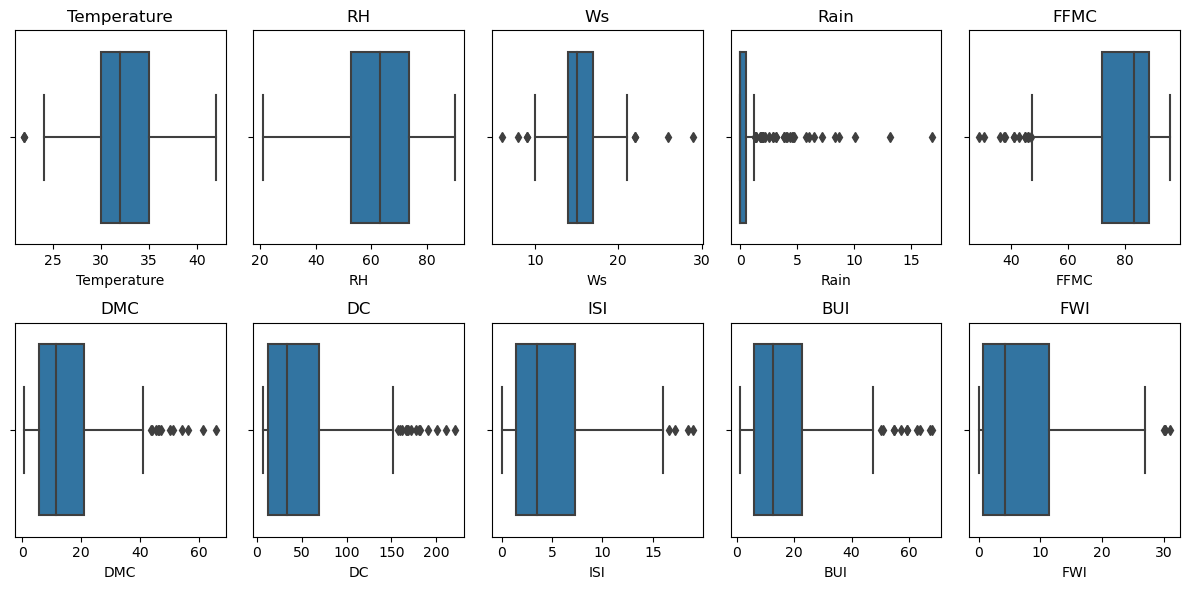

In [15]:
#Setting the size for the plot
plt.figure(figsize=(12, 6))

# Box plot for the given numerical features
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Looping through each numerical feature to create box plots
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 5, i)     # Create a subplot for each feature
    sns.boxplot(x=df[feature])  #Creating box plot for feature
    plt.title(feature)    # Set the title for the plot

# Adjusting layout to prevent overlap
plt.tight_layout()
#Displaying result
plt.show()

#### CODE FOR HANDLING OUTLIERS

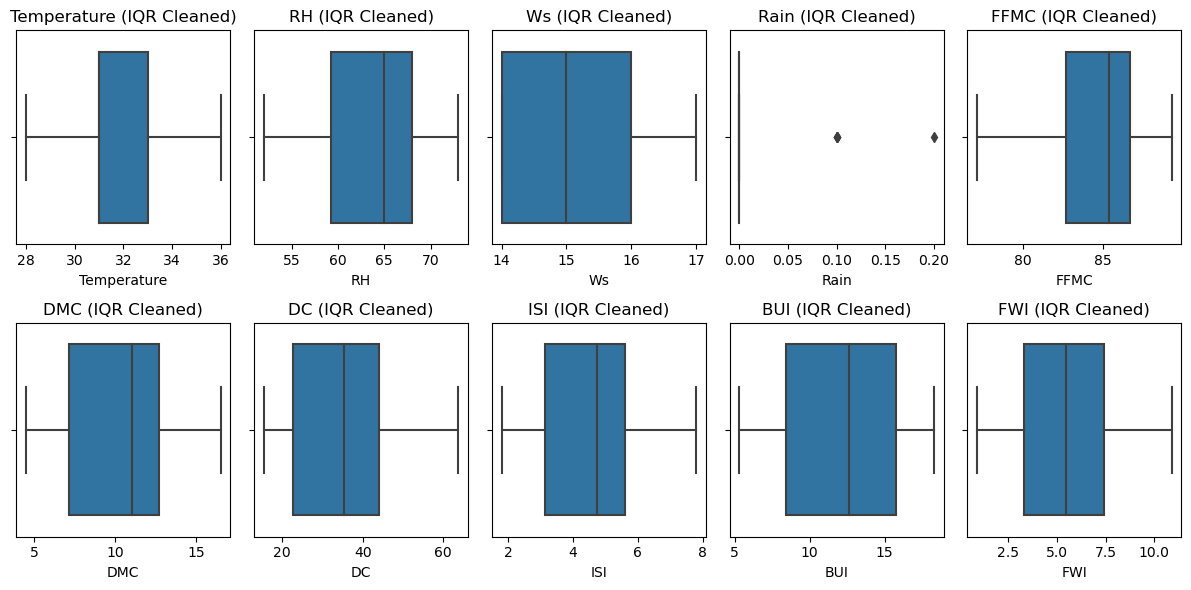

In [16]:
# List of numerical features 
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Handling Outliers Using IQR Method
def handle_outliers_iqr(data):
    # Calculate the first and third quartiles
    Q1 = data.quantile(0.42)
    Q3 = data.quantile(0.58)
    IQR = Q3 - Q1
    # Keeping only those rows that are not outliers
    data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data_clean


# Extracting the numerical features from the DataFrame
X = df[numerical_features] 

# Applying IQR Method
X_cleaned_iqr = handle_outliers_iqr(X)

# Box plot to visualize the numerical features after handling outliers with IQR
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=X_cleaned_iqr[feature])
    plt.title(f'{feature} (IQR Cleaned)')

plt.tight_layout()
plt.show()

In [17]:
# Display summary statistics of the dataset after handling outliers

print("\nSummary Statistics of the dataset after handling outliers:")
print("-----------------------------------------------")

df.describe()


Summary Statistics of the dataset after handling outliers:
-----------------------------------------------


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [18]:
# Defining features and target variable
x = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]  
y = df['FWI']  # Target variable

# Split into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### FEATURE SELECTION

In [19]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df.corr() 

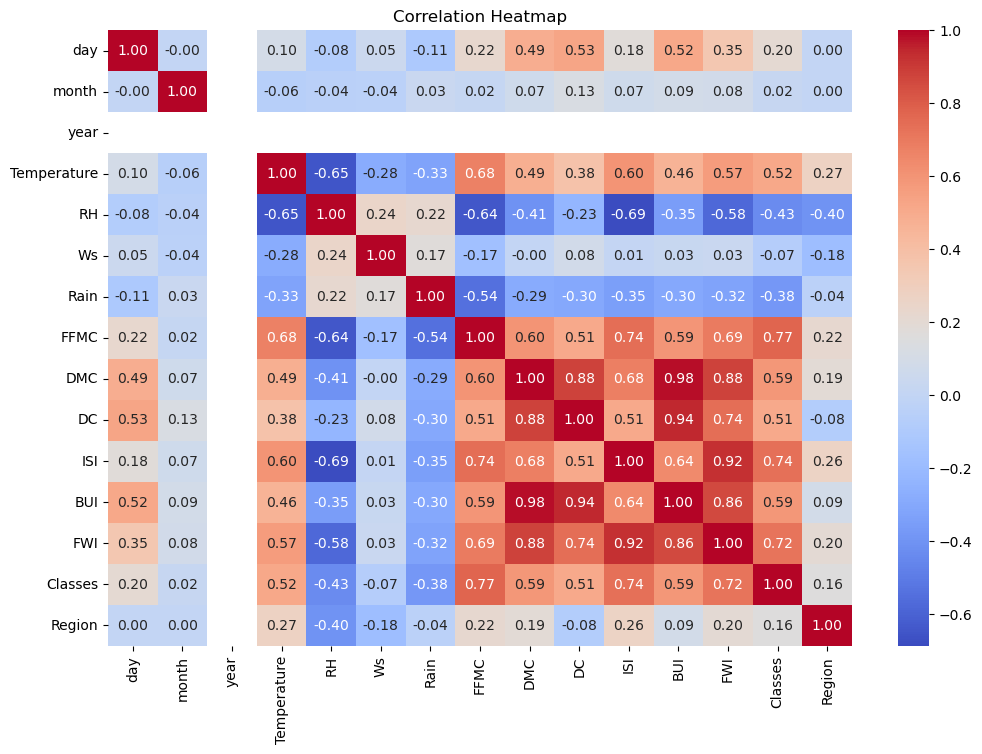

In [20]:
plt.figure(figsize=(12, 8))  
# Creating a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 2. DATA VISUALIZATION AND OBSERVATIONS

### EDA(EXPLORATORY DATA ANALYSIS)

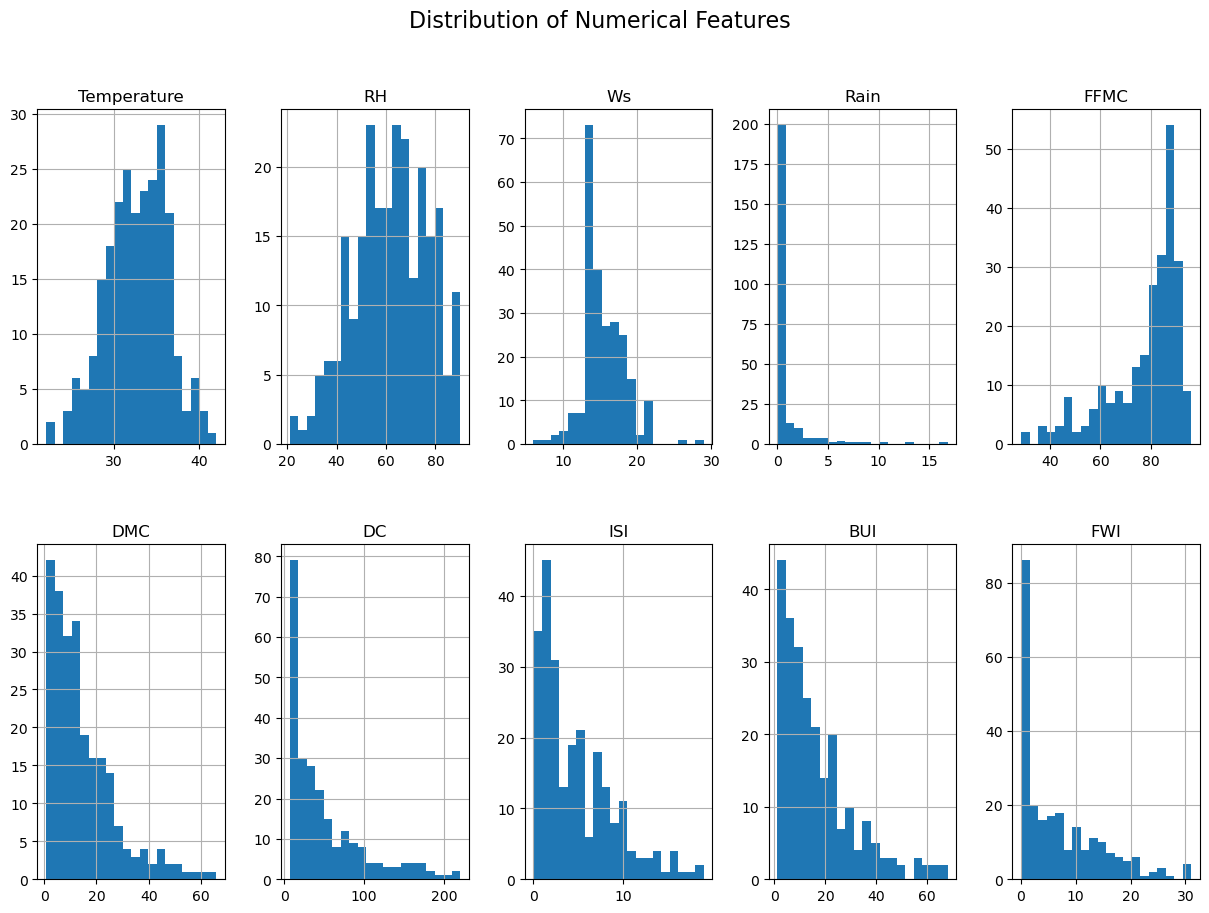

In [21]:
# Histograms for all the numerical features in the dataset
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 5))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


Temperature:
From the distribution above, it may be observed that the distribution leans slightly to the left implying that frequencies of higher temperatures are more common in the dataset.
The majority of temperatures is rather close, fluctuating in the range of 30 to 40 Celsius scales.

RH (Relative Humidity):
This feature is fairly normally distributed but with slightly higher standard deviation to the right.
The majority of the RH values is from 40/ 80%.

Ws (Wind Speed):
Consequently, wind speed distributions can be considered positively skewed or right skewed.
A large number of cases have speeds less than or equal to 10 m/s, while the number of values increases only at higher wind speeds.

Rain:
This feature is positively skewed where most values are located at 0 mm, suggesting that there is very little rain within the study data.
Much less than a third of these events include rain exceeding 5 mm.

FFMC (Fine Fuel Moisture Code):
Extraordinary outliers are absent on the right side of the vertical axis, while on the left side most values are above 80 meaning that the forest is dry and prone to fire breakouts.

DMC (Duff Moisture Code):
This feature is skewed right, mean that the most of the instances have low values, less than 20, while several instances have high values.

DC (Drought Code):
Following the same pattern like DMC, distribution for DC is skewed right.
The majority floats between 0 and one hundred yet one finds some representations going up to two hundred.

ISI (Initial Spread Index):
The ISI also displays a positively skewed, and all observed values are below 10. This suggests that ordinary fire spread rates at initial stages in the dataset are relatively small.

BUI (Buildup Index):
As shown in DMC and DC, BUI is also positiv skewed.
Majority are located in the scale below 20 so majority are characterized by low integrated attributes of fire danger across the wash.

FWI (Fire Weather Index):
The FWI is calculated and illustrated in a frequency distribution where nearly all FWI values fall below ten. This means there are few occurrences of a fire weather that allows enhanced fire spread but they exist.

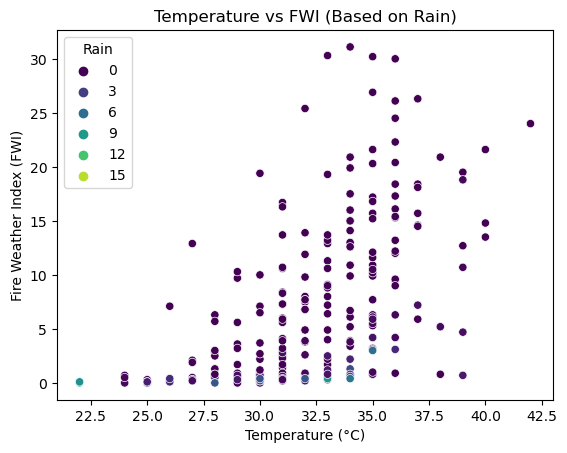

In [22]:
# Scatter plot between Temperature and FWI based on Rain
sns.scatterplot(x='Temperature', y='FWI', hue='Rain', data=df, palette='viridis')
plt.title('Temperature vs FWI (Based on Rain)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fire Weather Index (FWI)')
plt.show()



From the analysis, it can be realized that as Temperature increases, the FWI values are also high which imply that temperature and FWI have a common relationship.
Fewer cases fall under the group with rainfall (colored), and the majority of the higher FWI values occur when rain is negligible (Rain = 0).
A little more scatter is observed for the lower values of FWI and the higher temperatures the corresponding higher values of FWI conditions are observed.
From the color distribution of the PPT, it appears to occur occasionally and its occurrences are more likely within the lower FWI range. 


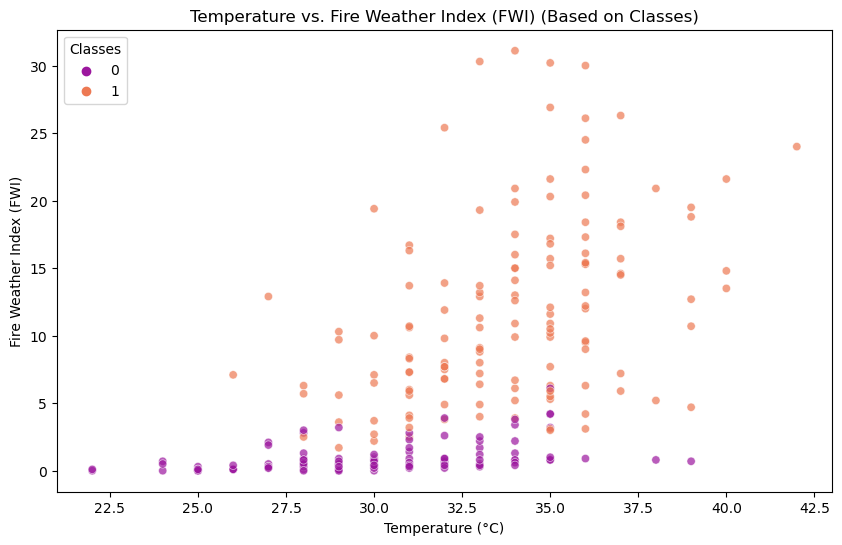

In [23]:
# Scatter plot between Temperature and FWI based on Classes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='FWI', hue='Classes', palette='plasma', alpha=0.7)
plt.title('Temperature vs. Fire Weather Index (FWI) (Based on Classes)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fire Weather Index (FWI)')
plt.legend(title='Classes', loc='upper left')
plt.show()


Higher temperatures generally correlate with higher FWI values, indicating increased fire risk.
Class ‘0’ (Purple) points are concentrated at lower FWI values, suggesting lower fire risk.
Class ‘1’ (Orange) points are spread across the FWI range, indicating varying levels of fire risk.

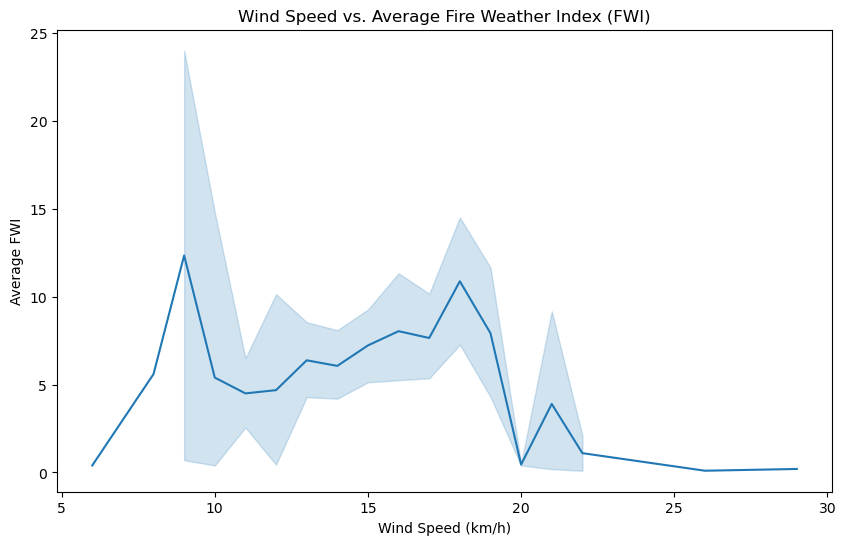

In [24]:
# Creating line plot with 'Ws' (Wind Speed) and 'FWI' (Fire Weather Index)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Ws', y='FWI')
plt.title('Wind Speed vs. Average Fire Weather Index (FWI)')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Average FWI')
plt.show()


This graph is basically the comparison of the wind speed in kilometer per hour with average Fire Weather Index (FWI). 

General Trend: With greater values of wind speed, it may be noted that for most of the EWIF stations, FWI averages also tend to rise, which establishes the fact that there is a relationship between wind speed and FWI.

Peaks and Fluctuations: We are able to see higher averages of FWI at 5 and at right before 20 kph. As the wind speed increases beyond the maximum FWI of approximately 20 km/h, the average FWI decreases rather steeply.

Variability: The shaded blue area around the line means there is some scatter or uncertainty which shows that there is no direct linear relationship of wind speed with FWI.


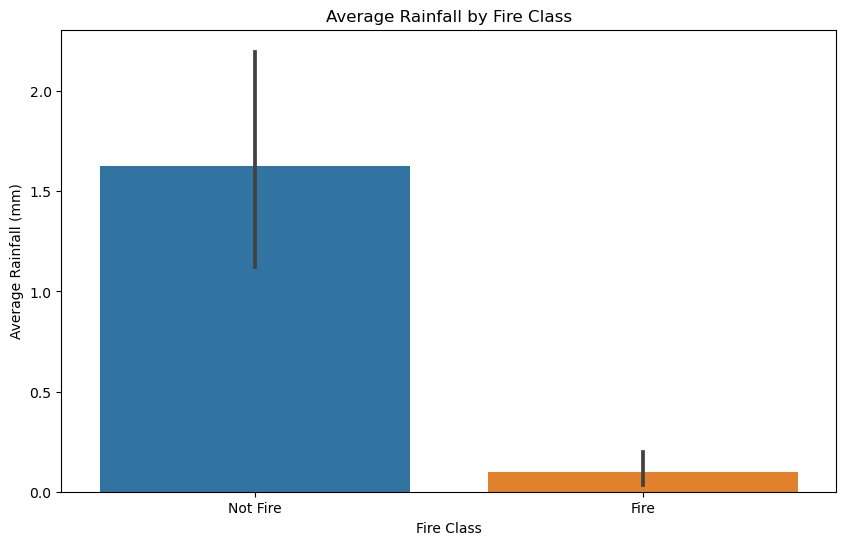

In [25]:
# Bar plot that shows average Rainfall by Fire Class

plt.figure(figsize=(10, 6))
# Create a bar plot to visualize the average rainfall by fire class
# Using 'estimator=np.mean' to calculate the average rainfall for each class
sns.barplot(data=df, x='Classes', y='Rain', estimator=np.mean)
# Set the title and labels for the plot
plt.title('Average Rainfall by Fire Class')
plt.xlabel('Fire Class')
plt.ylabel('Average Rainfall (mm)')
# Customize the x-ticks to show labels
plt.xticks(ticks=[0, 1], labels=['Not Fire', 'Fire'])
plt.show()


Higher Rainfall and Fire Incidence: One gets the impression that the likelihood of fires occurring is inversely proportional to the probability density of rainfall in areas or at certain times within a given country. On the other hand, lower mean rainfall a risk factor is associated with an increase in fire risk of occurrence.

Variability in Rainfall: The greater standard deviation in the “Not Fire” class is suggestive of the fact that while there is more rainfall under non-fire circumstances, the magnitude can be substantially more or lesser.

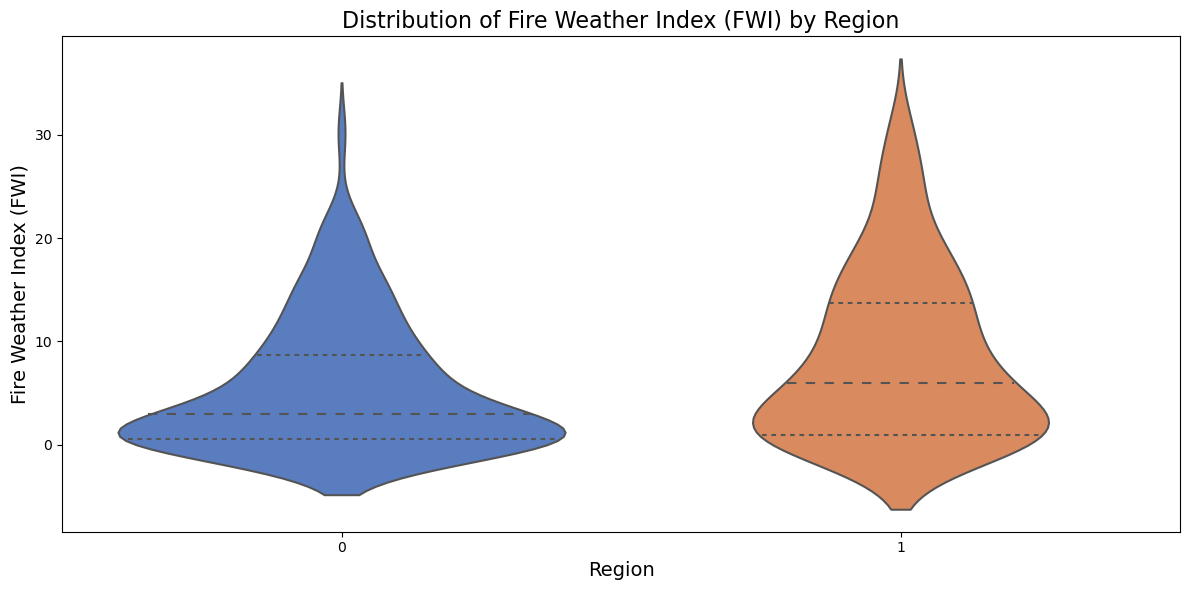

In [26]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a violin plot of FWI grouped by Region
sns.violinplot(x='Region', y='FWI', data=df, inner='quartile', palette='muted')

# Enhance the plot with title and labels
plt.title('Distribution of Fire Weather Index (FWI) by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Fire Weather Index (FWI)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


Fire Risk: Region 1 has a significantly higher and diverse fire potential than Region 0, which is characterized by frequent, but relatively low fire weather only.

Management Implications: These differences imply that fire management strategies may need to be considerably and diversely more effective in region one to tackle the higher and more frequent fire dangers.

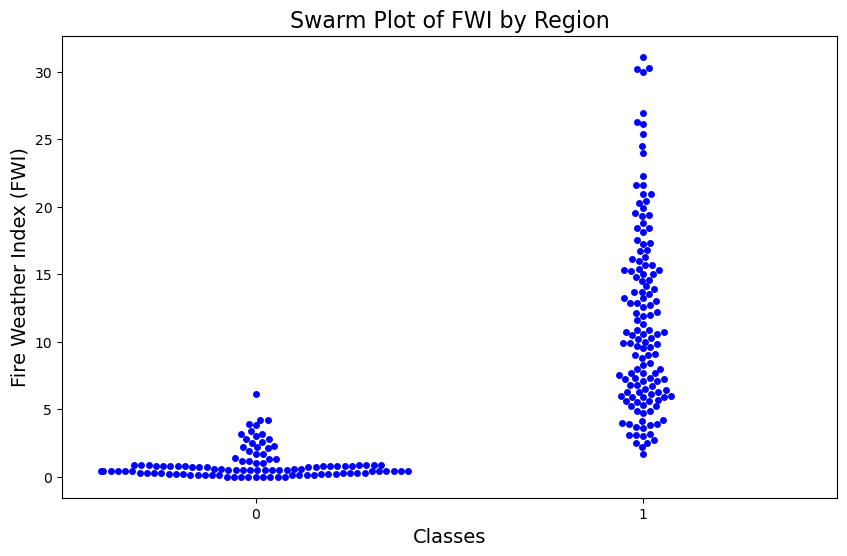

In [27]:
# Creating a swarm plot with 'Classes' and 'FWI' 

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Classes', y='FWI', data=df, color='blue')
plt.title('Swarm Plot of FWI by Region', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Fire Weather Index (FWI)', fontsize=14)
plt.show()


Fire Risk: Class 1 has a higher and more varied fire risk compared to Class 0.

Management Strategies: Fire management efforts might need to be more intensive and varied in Class 1 to address the higher and more frequent fire risks.

## 3. MODEL DEVELOPMENT AND ANALYSIS

In [28]:
# Normalisation

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [29]:
# Save the StandardScaler model as a .pkl file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nModel saved as 'scaler_file.pkl'")


Model saved as 'scaler_file.pkl'


In [30]:
lr=LinearRegression()
# train the model
lr.fit(x_train,y_train)
# predict the values
y_pred=lr.predict(x_test)
# Evaluate the model's performance

print("r2_score",r2_score(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.9882726857720829
mean_squared_error 0.35543638257764537
mean_absolute_error 0.4240179386916376
RMSE 0.596184856045208


### REGULARIZATION MODELS (RIDGE,LASSO AND ELASTIC NET)

In [31]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [32]:
ls=Lasso()
rd=Ridge()
en=ElasticNet()

##### 1.1 RIDGE REGRESSION (L2)

In [33]:
# train the model with ridge
rd.fit(x_train,y_train)

# Print the coefficients and intercept of the model
print(rd.coef_, rd.intercept_)

# Make predictions on the training and test sets
y_pred_tr_rd=rd.predict(x_train)
y_pred_rd=rd.predict(x_test)

print()
print("----------------------------------------------------------------")
# Evaluate metrics on training data
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_rd))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_rd))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_rd))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_rd)))
print()
print("----------------------------------------------------------------")
# Evaluate metrics on testing data
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_rd))
print("mean_squared_error",mean_squared_error(y_test,y_pred_rd))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_rd))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_rd)))

[-0.07119056 -0.10509525 -0.07805974  0.04519824 -0.64403909  1.58444573
  0.46682311  5.13829157  1.79498081] 7.420103092783505

----------------------------------------------------------------
Metrices on train_data
r2_score 0.9729313264255479
mean_squared_error 1.6422747875229886
mean_absolute_error 0.6793297885894188
RMSE 1.2815126950299747

----------------------------------------------------------------
Metrices on test_data
r2_score 0.9813740484635766
mean_squared_error 0.5645231898377066
mean_absolute_error 0.4769024031723354
RMSE 0.751347582572611


In [34]:
# Save the trained Ridge model as a .pkl file
with open('ridge_model.pkl', 'wb') as ridge_model_file:
    pickle.dump(rd, ridge_model_file)

print("\nModel saved as 'ridge_model.pkl'")



Model saved as 'ridge_model.pkl'


##### 1.2 LASSO REGRESSION(L1)

In [35]:
# train the ls model
ls.fit(x_train,y_train)

# Print the coefficients and intercept of the model
print(ls.coef_, ls.intercept_)

# Make predictions on the training and test sets
y_pred_tr_ls=ls.predict(x_train)
y_pred_ls=ls.predict(x_test)

print()
print("----------------------------------------------------------------")
# Evaluate metrics on training data
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_ls))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_ls))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_ls))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_ls)))
print()
print("----------------------------------------------------------------")
# Evaluate metrics on testing data
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_ls))
print("mean_squared_error",mean_squared_error(y_test,y_pred_ls))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_ls))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_ls)))

[ 0.         -0.          0.         -0.          0.          1.653321
  0.          4.12303619  1.42846705] 7.420103092783506

----------------------------------------------------------------
Metrices on train_data
r2_score 0.9493233613044427
mean_squared_error 3.0745860456448453
mean_absolute_error 1.2482158555060359
RMSE 1.7534497556659117

----------------------------------------------------------------
Metrices on test_data
r2_score 0.9527917018651334
mean_squared_error 1.4308089977464684
mean_absolute_error 0.9552746314709519
RMSE 1.19616428543343


In [36]:
# Save the trained Lasso model as a .pkl file
with open('lasso_model.pkl', 'wb') as lasso_model_file:
    pickle.dump(ls, lasso_model_file)

print("\nModel saved as 'lasso_model.pkl'")



Model saved as 'lasso_model.pkl'


##### 1.3 ELASTIC NET

In [37]:
# train the en model
en.fit(x_train,y_train)

print(en.coef_, en.intercept_)
y_pred_tr_en=en.predict(x_train)
y_pred_en=en.predict(x_test)

print()
print("----------------------------------------------------------------")
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_en))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_en))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_en))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_en)))
print()
print("----------------------------------------------------------------")
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_en))
print("mean_squared_error",mean_squared_error(y_test,y_pred_en))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_en))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_en)))

[ 0.14824235 -0.58630784  0.         -0.          0.42766544  1.46348641
  0.79341387  2.40031387  1.29192521] 7.420103092783506

----------------------------------------------------------------
Metrices on train_data
r2_score 0.9092615356500454
mean_squared_error 5.505164183631429
mean_absolute_error 1.797870992965025
RMSE 2.346308629236876

----------------------------------------------------------------
Metrices on test_data
r2_score 0.8672203913305506
mean_squared_error 4.024340344969736
mean_absolute_error 1.6165226744317267
RMSE 2.0060758572321578


In [38]:
# Save the trained ElasticNet model as a .pkl file
with open('elasticnet_model.pkl', 'wb') as elasticnet_model_file:
    pickle.dump(en, elasticnet_model_file)

print("\nModel saved as 'elasticnet_model.pkl'")



Model saved as 'elasticnet_model.pkl'


##### LINEAR REGRESSION

In [39]:
# Print the coefficients and intercept of the model
print(lr.coef_, lr.intercept_)

# Make predictions on the training and test sets
y_pred_tr_lr=lr.predict(x_train)
y_pred_lr=lr.predict(x_test)

print()
print("----------------------------------------------------------------")
# Evaluate metrics on training data
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_lr))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_lr))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_lr))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_lr)))
print()
print("----------------------------------------------------------------")
# Evaluate metrics on testing data
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_lr))
print("mean_squared_error",mean_squared_error(y_test,y_pred_lr))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_lr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

[-0.06817899 -0.07819109 -0.09428617  0.03138245 -0.71845377  0.1327554
 -0.31585419  5.24282804  3.95540463] 7.420103092783506

----------------------------------------------------------------
Metrices on train_data
r2_score 0.973083838832041
mean_squared_error 1.633021756365806
mean_absolute_error 0.6726204982726638
RMSE 1.277897396650375

----------------------------------------------------------------
Metrices on test_data
r2_score 0.9882726857720829
mean_squared_error 0.35543638257764537
mean_absolute_error 0.4240179386916376
RMSE 0.596184856045208


In [40]:
# Save the trained Linear Regression model as a .pkl file
with open('linear_regression_model.pkl', 'wb') as linear_regression_model_file:
    pickle.dump(lr, linear_regression_model_file)

print("\nModel saved as 'linear_regression_model.pkl'")



Model saved as 'linear_regression_model.pkl'


### EFFECTIVE USE OF CROSS-VALIDATION 

##### RIDGE REGRESSION

In [41]:
#  Cross-Validation for ridge

cv_scores = cross_val_score(rd, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the model on the training data
rd.fit(x_train, y_train)

# Predictions on the test set
y_pred = rd.predict(x_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test r2_score: {r2}')



Cross-Validation MSE: 2.261011760381296
Test MSE: 0.5645231898377066
Test r2_score: 0.9813740484635766


In [42]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_ridge.pkl', 'wb') as ridge_CV_model_file:
    pickle.dump(rd, ridge_CV_model_file)

print("\nModel saved as 'ridge_CV_model.pkl'")



Model saved as 'ridge_CV_model.pkl'


##### LASSO REGRESSION

In [43]:
#Cross-Validation for lasso

cv_scores = cross_val_score(ls, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the model on the training data
ls.fit(x_train, y_train)

# Predictions on the test set
y_pred = ls.predict(x_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test r2_score: {r2}')



Cross-Validation MSE: 3.456502232095809
Test MSE: 1.4308089977464684
Test r2_score: 0.9527917018651334


In [44]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_lasso.pkl', 'wb') as lasso_CV_model_file:
    pickle.dump(ls, lasso_CV_model_file)

print("\nModel saved as 'lasso_CV_model.pkl'")



Model saved as 'lasso_CV_model.pkl'


##### ELASTIC NET

In [45]:
#  Cross-Validation for elastic net

cv_scores = cross_val_score(en, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the model on the training data
en.fit(x_train, y_train)

# Predictions on the test set
y_pred = en.predict(x_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test r2_score: {r2}')



Cross-Validation MSE: 5.81534263921269
Test MSE: 4.024340344969736
Test r2_score: 0.8672203913305506


In [46]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_elasticnet.pkl', 'wb') as elasticnet_CV_model_file:
    pickle.dump(en, elasticnet_CV_model_file)

print("\nModel saved as 'elasticnet_CV_model.pkl'")



Model saved as 'elasticnet_CV_model.pkl'


### EFFECTIVE USE OF HYPERPARAMETER TUNING

##### RIDGE REGRESSION

In [47]:
param_grid_rd = {
    'alpha': [0.1, 1, 10, 100, 1000],  # Regularization strength

}
# Set up the grid search
grid_search = GridSearchCV(rd, param_grid_rd, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


Optimal Parameters: {'alpha': 1}
Optimal Cross-Validation MSE: 2.261011760381296
Test MSE (Optimal Model): 0.5645231898377066
Test r2_score (Optimal Model): 0.9813740484635766


In [48]:
# Save the trained hyperparameter tuned ridge model as a .pkl file
with open('hyperparameter_tuned_ridge.pkl', 'wb') as ridge_ht_model_file:
    pickle.dump(rd, ridge_ht_model_file)

print("\nModel saved as 'ridge_ht_model.pkl'")



Model saved as 'ridge_ht_model.pkl'


##### LASSO REGRESSION

In [49]:
param_grid_ls = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
}

# Set up the grid search
grid_search = GridSearchCV(ls, param_grid_ls, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


Optimal Parameters: {'alpha': 0.01}
Optimal Cross-Validation MSE: 2.2771406390026994
Test MSE (Optimal Model): 0.38815960132054167
Test r2_score (Optimal Model): 0.9871930116375337


In [50]:
# Save the trained hyperparameter tuned lasso model as a .pkl file
with open('hyperparameter_tuned_lasso.pkl', 'wb') as lasso_ht_model_file:
    pickle.dump(ls, lasso_ht_model_file)

print("\nModel saved as 'lasso_ht_model.pkl'")



Model saved as 'lasso_ht_model.pkl'


##### ELASTIC NET

In [51]:
# Define the parameter grid for elastic net
param_grid_en= {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],       # Mix of L1 and L2
}

# Set up the grid search
grid_search = GridSearchCV(en, param_grid_en, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


Optimal Parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Optimal Cross-Validation MSE: 2.2530270112013993
Test MSE (Optimal Model): 0.6100636970362697
Test r2_score (Optimal Model): 0.9798714790469536


In [52]:
# Save the trained hyperparameter tuned elasticnet model as a .pkl file
with open('hyperparameter_tuned_elasticnet.pkl', 'wb') as elasticnet_ht_model_file:
    pickle.dump(en, elasticnet_ht_model_file)

print("\nModel saved as 'elasticnet_ht_model.pkl'")



Model saved as 'elasticnet_ht_model.pkl'


## 4. TESTING THE MODEL ON UNSEEN DATA AND PROVIDING A THROUGH ANALYSIS OF RESULTS

In [53]:
import pickle

sc=pickle.load(open('scaler.pkl','rb'))
poly=pickle.load(open('poly_feature.pkl','rb'))
ridge=pickle.load(open('ridge_model.pkl','rb'))
lasso=pickle.load(open('lasso_model.pkl','rb'))
lr=pickle.load(open('linear_regression_model.pkl','rb'))
en=pickle.load(open('elasticnet_model.pkl','rb'))
ridge_CV=pickle.load(open('cross_validation_model_ridge.pkl','rb'))
lasso_CV=pickle.load(open('cross_validation_model_lasso.pkl','rb'))
elasticnet_CV=pickle.load(open('cross_validation_model_elasticnet.pkl','rb'))
ridge_ht=pickle.load(open('hyperparameter_tuned_ridge.pkl','rb'))
lasso_ht=pickle.load(open('hyperparameter_tuned_lasso.pkl','rb'))
elasticnet_ht=pickle.load(open('hyperparameter_tuned_elasticnet.pkl','rb'))

In [54]:
# Set random seed for reproducibility
np.random.seed(50)

# Generate 15 rows of fake data
n_samples = 15

unseen_data = {
    'Temperature': np.random.uniform(15, 40, n_samples),  # Random temperatures between 15 and 40
    'RH': np.random.uniform(30, 90, n_samples),           # Random relative humidity between 30% and 90%
    'Ws': np.random.uniform(5, 25, n_samples),            # Random wind speed between 5 and 25
    'Rain': np.random.uniform(0, 16, n_samples),          # Random Rain index between 0 and 16
    'FFMC': np.random.uniform(60, 90, n_samples),         # Random FFMC index between 60 and 90
    'DMC': np.random.uniform(0, 50, n_samples),           # Random DMC index between 0 and 50
    'DC': np.random.uniform(0, 150, n_samples),           # Random DC index between 0 and 150
    'ISI': np.random.uniform(0, 10, n_samples),           # Random ISI index between 0 and 10
    'BUI': np.random.uniform(0, 50, n_samples),           # Random BUI index between 0 and 50
    'FWI': np.random.uniform(0, 20, n_samples),           # Random FWI index between 0 and 20
}

In [55]:
# Convert to DataFrame
unseen_df = pd.DataFrame(unseen_data)

In [56]:
# Display the first few rows of the fake dataset
print(unseen_df.head())

   Temperature         RH         Ws       Rain       FFMC        DMC  \
0    27.365041  63.597426  23.760304  12.509339  64.168802  46.837560   
1    20.702078  48.815445  19.281854  11.612004  63.369216  42.686125   
2    21.386848  83.292002  19.653752   1.997675  74.333549  21.077290   
3    24.908248  70.474384  14.234954  14.660935  76.208887   0.271993   
4    24.432877  53.465247  23.626585   6.203376  88.742131   1.743266   

          DC       ISI        BUI        FWI  
0  83.944417  5.821086  29.415741   9.162862  
1  91.985636  9.870218   0.826723  18.048583  
2  44.715248  2.090885  18.501109  11.898738  
3  90.356876  2.123761   2.106475   8.252267  
4  63.851526  9.611350   6.364028   8.113019  


In [57]:
# Ensure unseen_df has the same columns as the training set
# Remove 'FWI' if it wasn't used when training the models
unseen_df_filtered = unseen_df.drop(columns=['FWI'], errors='ignore')

# Scale the unseen data using the loaded scaler
scaled_unseen_data = sc.transform(unseen_df_filtered)

# Initialize a dictionary to store model predictions
model_predictions = {}

# List of loaded models (without Polynomial Regression)
models = {
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Linear Regression': lr,
    'ElasticNet': en,
    'Ridge CV': ridge_CV,
    'Lasso CV': lasso_CV,
    'ElasticNet CV': elasticnet_CV,
    'Hyperparameter Tuned Ridge': ridge_ht,
    'Hyperparameter Tuned Lasso': lasso_ht,
    'Hyperparameter Tuned ElasticNet': elasticnet_ht,
}

# Iterate over each model and make predictions
for model_name, model in models.items():
    try:
        predictions = model.predict(scaled_unseen_data)  # Make predictions on the scaled unseen data
        model_predictions[model_name] = predictions
        print(f"Predictions from {model_name}: {predictions}")
    except Exception as e:
        print(f"Error with model {model_name}: {e}")

# Convert the predictions into a DataFrame for easy comparison
predictions_df = pd.DataFrame(model_predictions)

# Display the predictions DataFrame
print(predictions_df)


Predictions from Ridge Regression: [14.7818054  16.14003636  4.95803752  1.31457447  9.74802653  7.50917622
  9.8001557   9.4039661  11.67882444 11.20741301  5.91542642  8.22829873
 18.65552403  4.15933036 12.81831799]
Predictions from Lasso Regression: [13.41011111 14.03256507  5.55264796  1.39235695  9.12618325  6.81537943
  9.30820812  9.38593987 10.25376545 10.51659401  7.12496701  8.87383074
 16.29541519  4.73464417 13.3264618 ]
Predictions from Linear Regression: [12.44827127 10.13977247  4.51960203  0.03821256  9.41814182  7.50084158
  6.52778384 12.35251109 15.347076    7.49417992  3.95632648  6.2284188
 18.96653681  2.71876254  9.80668822]
Predictions from ElasticNet: [12.32256812 12.06182075  5.09578737  2.80239784  8.09586788  7.07601199
  8.79697172  9.35820758 11.20344429  8.91116074  8.48342105 10.04161235
 14.73256469  7.52226479 10.27282511]
Predictions from Ridge CV: [14.7818054  16.14003636  4.95803752  1.31457447  9.74802653  7.50917622
  9.8001557   9.4039661  11.67

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the target variable (y_unseen) from unseen_df
y_unseen = unseen_df['FWI']  # Replace 'FWI' with the actual name of the target column

# Drop the target column from unseen_df before scaling the features
X_unseen = unseen_df.drop('FWI', axis=1)  # Replace 'FWI' with the target column name

# Scale the unseen features
scaled_unseen_data = sc.transform(X_unseen)

# Now proceed with calculating metrics as before
model_metrics = {}

for model_name, model in models.items():
    try:
        predictions = model.predict(scaled_unseen_data)
        
        # Calculate metrics
        mse = mean_squared_error(y_unseen, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_unseen, predictions)
        r2 = r2_score(y_unseen, predictions)
        
        # Store the metrics
        model_metrics[model_name] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2
        }

 # Print metrics for each model
        print(f"Metrics for {model_name}:")
        print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}\n")

    except Exception as e:
        print(f"Error with model {model_name}: {e}")

Metrics for Ridge Regression:
MSE: 19.9347, RMSE: 4.4648, MAE: 3.8108, R²: 0.2514

Metrics for Lasso Regression:
MSE: 18.9424, RMSE: 4.3523, MAE: 3.6424, R²: 0.2887

Metrics for Linear Regression:
MSE: 32.6352, RMSE: 5.7127, MAE: 4.7932, R²: -0.2255

Metrics for ElasticNet:
MSE: 23.9311, RMSE: 4.8919, MAE: 3.9697, R²: 0.1014

Metrics for Ridge CV:
MSE: 19.9347, RMSE: 4.4648, MAE: 3.8108, R²: 0.2514

Metrics for Lasso CV:
MSE: 18.9424, RMSE: 4.3523, MAE: 3.6424, R²: 0.2887

Metrics for ElasticNet CV:
MSE: 23.9311, RMSE: 4.8919, MAE: 3.9697, R²: 0.1014

Metrics for Hyperparameter Tuned Ridge:
MSE: 19.9347, RMSE: 4.4648, MAE: 3.8108, R²: 0.2514

Metrics for Hyperparameter Tuned Lasso:
MSE: 18.9424, RMSE: 4.3523, MAE: 3.6424, R²: 0.2887

Metrics for Hyperparameter Tuned ElasticNet:
MSE: 23.9311, RMSE: 4.8919, MAE: 3.9697, R²: 0.1014



#### MSE (Mean Squared Error):

Best Performer: This said, the lasso regression model was trained, with its MSE equalling 18.9424.

Worst Performer: Linear Regression meaning Mean Squared Error = 32.6352

Analysis: A smaller value of MSE implies the predictions made by the model is closer to the true values/actual values. The Lasso has the lowest error, then Ridge, and the highest error, therefore which indicates that both Linear Regression models poorly for the data set.


#### RMSE (Root Mean Squared Error):

Best Performer: Lasso Regression: 4.3523

Worst Performer: Linear Regression model literally meant RMSE of 5.7117.

Analysis: Mean Absolute Error and Root Mean Square Error are the most preferred for the target variables measured in the same units. Once more, Lasso algorithm achieves the highest effectiveness; however, Linear Regression’s error margin from the real values is the highest.


#### MAE (Mean Absolute Error):
Best Performer: Lasso Regression model’s Performance (MAE) is 3.6424

Worst Performer: Multiple Linear Regression (MAE: 4.79316)

Analysis: MAE reveals that Lasso with an average of the absolute differences made by the predictors is the model offering the most accurate predictions. Linear Regression, although producing good training accuracy, has a larger average error, thus confirming the poor performance of this method on this dataset.


#### R² (R-squared):
Best Performer: Lasso Regression (R²: 0.2887)

Worst Performer: Linear Regression (-0.2255 R²)

Analysis: The R² is an interpretation of the ability to forecast the dependent variable based on the independent variables down to the level of variance. A negative value of R² for Linear Regression indicates that the model is even worse than a simple mean model of the given data whereas Lasso captures more variance (about 28.87%) than the other models of this dataset.


#### Hyperparameter Tuned Models:
As for Ridge CV, Lasso CV, ElasticNet CV there is no significant change compared to standardized counterparts meaning that hyperparameter tuning is not a strong improvement for those models.
Analysis: In most cases, tuning improves the performance of the model but in this context it has not offered any further advantage of the default parameters.


#### ElasticNet Performance:
ElasticNet and CV as well as tuned ElasticNet performs moderately well and can be ranked between Linear Regression and Ridge and Lasso.


#### Overall Conclusion:

Best Model: Here we observe that Lasso Regression accompanied with or without Cross Validation has outperformed all the models in respect to each of the above mentioned parameters indicating that it is good for feature selection without compromising accuracy.

Worst Model: The given results show that, score wise, Linear Regression is the worse off, with much higher errors and a negative value of R² indicating that it does not explain the relationship between the features and the target.

ElasticNet and Ridge: However, these models do not prove superior to Lasso in this regard, perhaps because Lasso has better regularization path when it shrinks coefficients to zero.